# olist 데이터 매출 예측
- 목표 : 특정 시간을 기준으로 기간 매출 예측
- 예측 변수 : 시간 컬럼
      
- 기준시 : 2018-05-12 15:05
    - 2018-05-06 - 2018-05-13. (주) 매출 예측
    - 2018-05-01 - 2018-05-31 (월) 매출 예측
    - 2018-04-01 - 2018-06-30 (분기) 매출 예측

## 1. import

In [1]:
import pandas as pd
import numpy as np
from functools import reduce

import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

## 2. 데이터 불러오기

In [2]:
original_df = pd.read_csv('olist_total.csv')
original_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,seller_geolocation_lat,seller_geolocation_lng,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,650.0,28.0,9.0,14.0,27277,volta redonda,SP,-22.496953,-44.127492,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.90,17.96,e6eecc5a77de221464d1c4eaff0a9b64,delivered,2017-06-28 11:52:20,...,650.0,28.0,9.0,14.0,27277,volta redonda,SP,-22.496953,-44.127492,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.90,18.33,4ef55bf80f711b372afebcb7c715344a,delivered,2018-05-18 10:25:53,...,650.0,28.0,9.0,14.0,27277,volta redonda,SP,-22.496953,-44.127492,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.90,16.17,30407a72ad8b3f4df4d15369126b20c9,delivered,2017-08-01 18:38:42,...,650.0,28.0,9.0,14.0,27277,volta redonda,SP,-22.496953,-44.127492,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.90,13.29,91a792fef70ecd8cc69d3c7feb3d12da,delivered,2017-08-10 21:48:40,...,650.0,28.0,9.0,14.0,27277,volta redonda,SP,-22.496953,-44.127492,cool_stuff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115032,2c12150c742ae2fa48bc703964c16c5f,1,2b54fb9a4acf707537eb53eb2458c241,ef728fa1f17436c91ed1ccd03dcf9631,2018-08-02 17:50:12,57.90,19.60,ab0cf72dfe0538a63a57d6905ccb7b57,delivered,2018-07-28 17:55:27,...,1000.0,25.0,25.0,25.0,17201,jau,SP,-22.294360,-48.558524,arts_and_craftmanship
115033,2ef4a11b6e24fdfbb43b92cb5f95edff,1,9c313adb4b38a55b092f53f83f78be9e,ef728fa1f17436c91ed1ccd03dcf9631,2018-07-30 09:17:39,19.00,12.86,ee1cfdc92e449920e25d3ca4ab4da4f6,delivered,2018-07-23 18:35:14,...,500.0,16.0,6.0,16.0,17201,jau,SP,-22.294360,-48.558524,arts_and_craftmanship
115034,2ef4a11b6e24fdfbb43b92cb5f95edff,2,eacb104882d39ffb53140b1d1860a7c3,ef728fa1f17436c91ed1ccd03dcf9631,2018-07-30 09:17:39,39.90,12.87,ee1cfdc92e449920e25d3ca4ab4da4f6,delivered,2018-07-23 18:35:14,...,500.0,21.0,7.0,14.0,17201,jau,SP,-22.294360,-48.558524,arts_and_craftmanship
115035,9f7ba492c273ffac8f90a623b8eadd3b,1,5aa0d6ed4e6c0995d62090cd82cde89a,ef728fa1f17436c91ed1ccd03dcf9631,2018-08-28 03:24:24,11.90,12.79,c61336d6c835632048f973d2f2db598d,delivered,2018-08-23 12:31:37,...,200.0,16.0,6.0,16.0,17201,jau,SP,-22.294360,-48.558524,arts_and_craftmanship


In [3]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115037 entries, 0 to 115036
Data columns (total 44 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       115037 non-null  object 
 1   order_item_id                  115037 non-null  int64  
 2   product_id                     115037 non-null  object 
 3   seller_id                      115037 non-null  object 
 4   shipping_limit_date            115037 non-null  object 
 5   price                          115037 non-null  float64
 6   freight_value                  115037 non-null  float64
 7   customer_id                    115037 non-null  object 
 8   order_status                   115037 non-null  object 
 9   order_purchase_timestamp       115037 non-null  object 
 10  order_approved_at              115023 non-null  object 
 11  order_delivered_carrier_date   113852 non-null  object 
 12  order_delivered_customer_date 

## 3. 데이터 전처리

In [4]:
df = original_df.copy()

df['order_purchase_date'] = df.order_purchase_timestamp.str[:10]
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

df['purchase_year'] = df['order_purchase_timestamp'].dt.year
df['purchase_month'] = df['order_purchase_timestamp'].dt.month
df['purchase_day'] = df['order_purchase_timestamp'].dt.day

df['order_purchase_date'] = pd.to_datetime(df['order_purchase_date'])

df = df[['order_purchase_date', 'purchase_year', 'purchase_month', 'purchase_day', 'payment_value']]
df

,order_purchase_date,purchase_year,purchase_month,purchase_day,payment_value
0,2017-09-13,2017,9,13,72.19
1,2017-06-28,2017,6,28,73.86
2,2018-05-18,2018,5,18,83.23
3,2017-08-01,2017,8,1,75.07
4,2017-08-10,2017,8,10,72.19
...,...,...,...,...,...
115032,2018-07-28,2018,7,28,77.50
115033,2018-07-23,2018,7,23,84.63
115034,2018-07-23,2018,7,23,84.63
115035,2018-08-23,2018,8,23,24.69


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115037 entries, 0 to 115036
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_purchase_date  115037 non-null  datetime64[ns]
 1   purchase_year        115037 non-null  int64         
 2   purchase_month       115037 non-null  int64         
 3   purchase_day         115037 non-null  int64         
 4   payment_value        115037 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 4.4 MB


## 3. EDA

In [6]:
df_day = pd.pivot_table(data=df, index='order_purchase_date', values='payment_value', aggfunc='sum')
df_day = df_day.sort_index()
df_day

,payment_value
order_purchase_date,
2016-09-04,272.46
2016-09-05,75.06
2016-10-02,109.34
2016-10-03,595.14
2016-10-04,13390.64
...,...
2018-08-26,10323.51
2018-08-27,5875.01
2018-08-28,5012.70


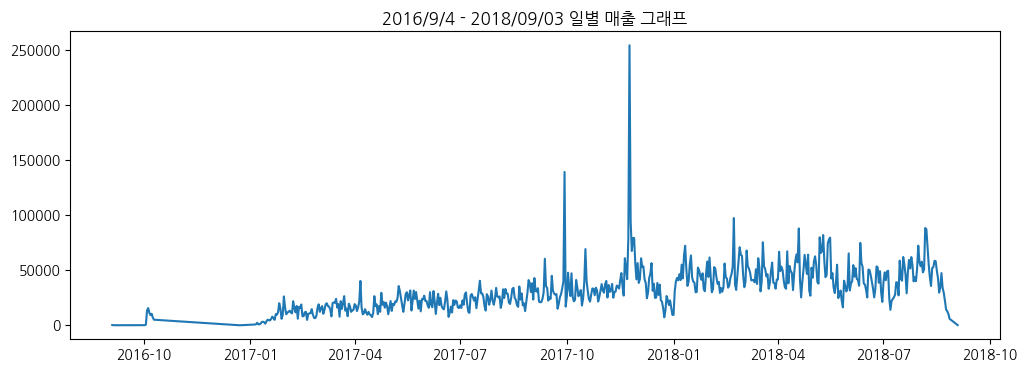

In [7]:
plt.figure(figsize=(12,4))
plt.plot(df_day['payment_value']);
plt.title('2016/9/4 - 2018/09/03 일별 매출 그래프')
plt.show()

In [8]:
df_day[df_day['payment_value']==df_day['payment_value'].max()]

,payment_value
order_purchase_date,
2017-11-24,254678.59


- 매년 11월 24일은 블랙프라이데이다. 매출이 폭발적으로 증가하는 날이다.

In [9]:
df_day_2017 = df_day[(df_day.index>='2017') & (df_day.index<'2018-04-01')]
df_day_2017

,payment_value
order_purchase_date,
2017-01-05,707.27
2017-01-06,988.28
2017-01-07,2294.51
2017-01-08,809.63
2017-01-09,882.63
...,...
2018-03-27,57051.28
2018-03-28,38828.39
2018-03-29,38305.06


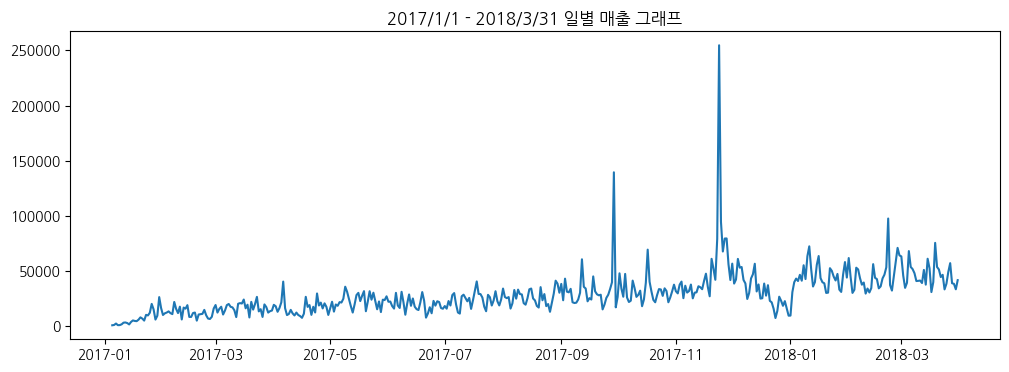

In [10]:
plt.figure(figsize=(12,4))
plt.plot(df_day_2017['payment_value'])
plt.title('2017/1/1 - 2018/3/31 일별 매출 그래프')
plt.show()

## 4. 모델링

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
df_day_2017 = df_day_2017.reset_index()

df_day_2017['order_purchase_date'] = pd.to_datetime(df_day_2017['order_purchase_date'])

df_day_2017['purchase_year'] = df_day_2017['order_purchase_date'].dt.year
df_day_2017['purchase_month'] = df_day_2017['order_purchase_date'].dt.month
df_day_2017['purchase_day'] = df_day_2017['order_purchase_date'].dt.day

# df_day_2017 = df_day_2017.drop(['order_purchase_date', 'order_purchase_timestamp'], axis=1)
df_day_2017

,order_purchase_date,payment_value,purchase_year,purchase_month,purchase_day
0,2017-01-05,707.27,2017,1,5
1,2017-01-06,988.28,2017,1,6
2,2017-01-07,2294.51,2017,1,7
3,2017-01-08,809.63,2017,1,8
4,2017-01-09,882.63,2017,1,9
...,...,...,...,...,...
446,2018-03-27,57051.28,2018,3,27
447,2018-03-28,38828.39,2018,3,28
448,2018-03-29,38305.06,2018,3,29
449,2018-03-30,33350.67,2018,3,30


In [13]:
X = df_day_2017.iloc[:, 2:]
y = df_day_2017['payment_value']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=128)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((360, 3), (91, 3), (360,), (91,))

In [14]:
from sklearn.ensemble import *
from sklearn.tree import *
from lightgbm import LGBMRegressor

etsr = ExtraTreesRegressor()
rfr = RandomForestRegressor()
etr = ExtraTreeRegressor()
bgr = BaggingRegressor()
dtr = DecisionTreeRegressor()
lgbmr = LGBMRegressor()

In [15]:
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import *

def rmsle(y, y_pred):
    msle = mean_squared_log_error(y, y_pred)
    rmsle = np.sqrt(msle)
    return rmsle

def model_diff(x_train, x_test, y_train, y_test):
    etsr.fit(x_train, y_train)
    y_pred1 = etsr.predict(x_test)

    rfr.fit(x_train, y_train)
    y_pred2 = rfr.predict(x_test)
    
    etr.fit(x_train, y_train)
    y_pred3 = etr.predict(x_test)
    
    bgr.fit(x_train, y_train)
    y_pred4 = bgr.predict(x_test)
    
    dtr.fit(x_train, y_train)
    y_pred5 = dtr.predict(x_test)
    
    lgbmr.fit(x_train, y_train)
    y_pred6 = lgbmr.predict(x_test)
    
    estr_rmsle = rmsle(y_test, y_pred1)
    rfr_rmsle = rmsle(y_test, y_pred2)
    etr_rmsle = rmsle(y_test, y_pred3)
    bgr_rmsle = rmsle(y_test, y_pred4)
    dtr_rmsle = rmsle(y_test, y_pred5)
    lgbmr_rmsle = rmsle(y_test, y_pred6)

    result_rmsle_list = [estr_rmsle, rfr_rmsle, etr_rmsle, bgr_rmsle, dtr_rmsle, lgbmr_rmsle]

    return result_rmsle_list  

In [16]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import RobustScaler

# 정규화 진행하지 않은 상태
no_scaler = model_diff(x_train, x_test, y_train, y_test)

# Normalize 정규화 적용
norm = Normalizer()
x_train_norm = norm.fit_transform(x_train)
x_test_norm = norm.transform(x_test)
normalizer_scaler = model_diff(x_train_norm, x_test_norm, y_train, y_test)

# Robust 정규화 적용
robust = RobustScaler()
x_train_robust = robust.fit_transform(x_train)
x_test_robust = robust.transform(x_test)
robust_scaler = model_diff(x_train_robust, x_test_robust, y_train, y_test)

# 세 가지 케이스 RMSE 값 비교
result = pd.DataFrame(index=['ExtraTreesRegressor','RandomForestRegressor','ExtraTreeRegressor',
                            'BaggingRegressor','DecisionTreeRegressor','LGBMRegressor'], 
                    columns=['no_scaler', 'normalizer', 'robust', 'min'])
result['no_scaler'] = no_scaler
result['normalizer'] = normalizer_scaler
result['robust'] = robust_scaler

for idx, row in result.iterrows():
    result.loc[idx, 'min'] = row.min()
result

,no_scaler,normalizer,robust,min
ExtraTreesRegressor,0.398188,0.512740,0.396106,0.396106
RandomForestRegressor,0.480039,0.454631,0.478204,0.454631
ExtraTreeRegressor,0.403106,0.779972,0.441665,0.403106
BaggingRegressor,0.452678,0.466169,0.523777,0.452678
DecisionTreeRegressor,0.490081,0.488402,0.478523,0.478523
LGBMRegressor,0.548686,0.476672,0.548686,0.476672


- 성능이 가장 좋았던 ExtraTreesRegressor 모델 robust 스케일러 적용 버전으로 선정

## 5. 하이퍼파라미터 조정

In [17]:
from sklearn.model_selection import GridSearchCV

params_etsr = {'n_estimators':[50,100,150],
                'min_samples_split':[2,4,6,8],
                'max_depth':[2,5,10]}

etsr_grid = GridSearchCV(etsr, params_etsr, n_jobs = -1, verbose=1, cv=5)
etsr_grid.fit(x_train_robust, y_train)
best_model = etsr_grid.best_estimator_
best_model

Fitting 5 folds for each of 36 candidates, totalling 180 fits


ExtraTreesRegressor(max_depth=5, min_samples_split=4)

In [18]:
y_test

399     37538.70
272     26608.88
406     43766.83
381     30296.36
55      19081.84
         ...    
267    139463.87
124     35687.98
70      24055.47
298     31433.95
30      13325.57
Name: payment_value, Length: 91, dtype: float64

베스트 모델 : ExtraTreesRegressor(max_depth=5, min_samples_split=8, n_estimators=50)

In [19]:
result = pd.DataFrame(columns=['실제값', '예측값'])
result['실제값'] = y_test.round(2)
result['예측값'] = best_model.predict(x_test_robust).round(2)
result['차이'] = abs(result['실제값'] - result['예측값'])
# result = result.reset_index()
result

,실제값,예측값,차이
399,37538.70,41979.20,4440.50
272,26608.88,33716.96,7108.08
406,43766.83,43671.99,94.84
381,30296.36,46081.82,15785.46
55,19081.84,15584.84,3497.00
...,...,...,...
267,139463.87,29844.17,109619.70
124,35687.98,20907.41,14780.57
70,24055.47,15655.40,8400.07
298,31433.95,33643.57,2209.62


In [20]:
result = pd.merge(df_day_2017, result, left_index=True, right_index=True, how='inner')
result = result[['order_purchase_date', '실제값', '예측값', '차이']]
result.set_index(['order_purchase_date'], inplace=True)

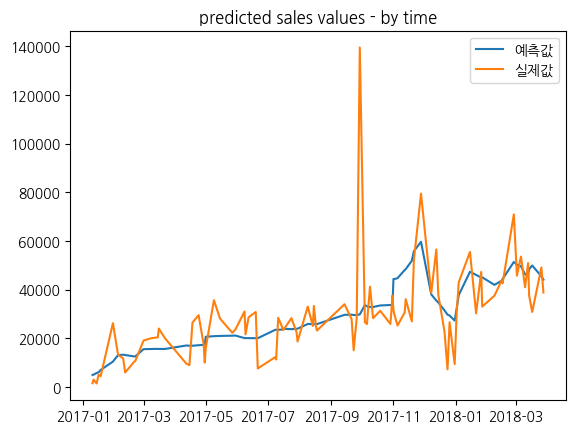

In [21]:
# plt.figure(figsize=(12,5))
plt.plot(result['예측값'], linestyle='-', label='예측값');
plt.plot(result['실제값'], linestyle='-', label='실제값');
plt.title('predicted sales values - by time')
plt.legend()
plt.show()

## 6. 주/월/분기 예측
2018-05-06 - 2018-05-12. (주) 매출 예측  
2018-05-01 - 2018-05-31 (월) 매출 예측  
2018-04-01 - 2018-06-30 (분기) 매출 예측

In [22]:
df_day_2018 = df_day[(df_day.index>='2018') & (df_day.index<'2019')]
df_day_2018 = df_day_2018.reset_index()
df_day_2018['order_purchase_date'] = pd.to_datetime(df_day_2018['order_purchase_date'])

df_day_2018['purchase_year'] = df_day_2018['order_purchase_date'].dt.year
df_day_2018['purchase_month'] = df_day_2018['order_purchase_date'].dt.month
df_day_2018['purchase_day'] = df_day_2018['order_purchase_date'].dt.day

df_day_2018

,order_purchase_date,payment_value,purchase_year,purchase_month,purchase_day
0,2018-01-01,9493.19,2018,1,1
1,2018-01-02,30773.71,2018,1,2
2,2018-01-03,39806.36,2018,1,3
3,2018-01-04,43046.43,2018,1,4
4,2018-01-05,40869.03,2018,1,5
...,...,...,...,...,...
237,2018-08-26,10323.51,2018,8,26
238,2018-08-27,5875.01,2018,8,27
239,2018-08-28,5012.70,2018,8,28
240,2018-08-29,4262.66,2018,8,29


In [23]:
X = df_day_2018[['purchase_year','purchase_month','purchase_day']]
x_robust = robust.transform(X)
y = df_day_2018['payment_value']

result = pd.DataFrame()
result['order_purchase_date'] = df_day_2018['order_purchase_date']

result['payment_value'] = y.round(2)
result['pred_value'] = best_model.predict(x_robust).round(2)
result['diff_value'] = abs(result['payment_value'] - result['pred_value'])

result = result.set_index(['order_purchase_date'])
result

,payment_value,pred_value,diff_value
order_purchase_date,,,
2018-01-01,9493.19,29579.41,20086.22
2018-01-02,30773.71,32440.00,1666.29
2018-01-03,39806.36,34504.04,5302.32
2018-01-04,43046.43,37811.60,5234.83
2018-01-05,40869.03,42677.13,1808.10
...,...,...,...
2018-08-26,10323.51,45483.62,35160.11
2018-08-27,5875.01,46376.92,40501.91
2018-08-28,5012.70,44133.30,39120.60


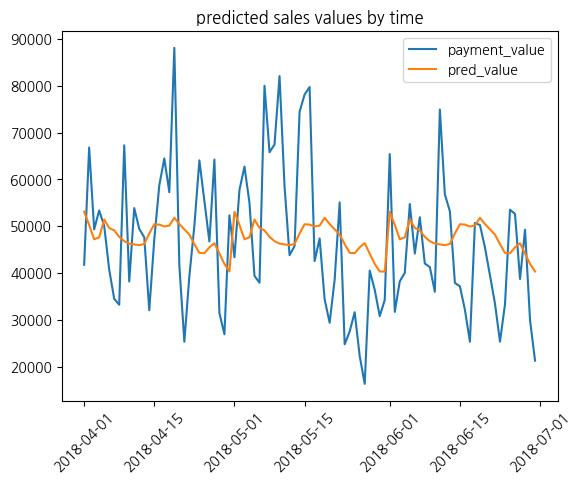

In [25]:
# 2018년도 2분기 예측값 조회

result = result[(result.index>=pd.to_datetime('2018-04'))&(result.index<pd.to_datetime('2018-07'))]

plt.plot(result['payment_value'], linestyle='-', label='payment_value')
plt.plot(result['pred_value'], linestyle='-', label='pred_value')
plt.title('predicted sales values by time')
plt.xticks(rotation=45)
plt.legend()
plt.show()

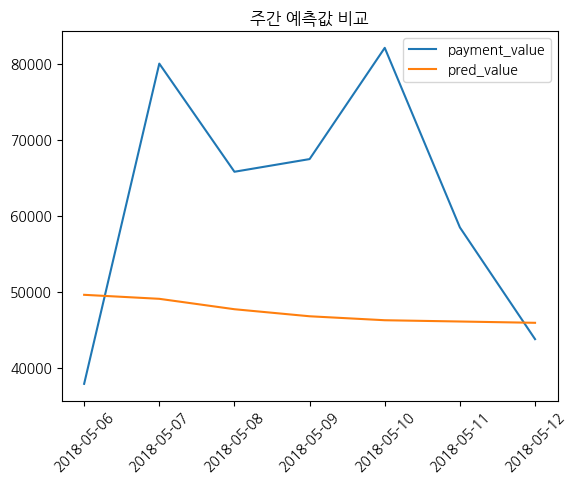

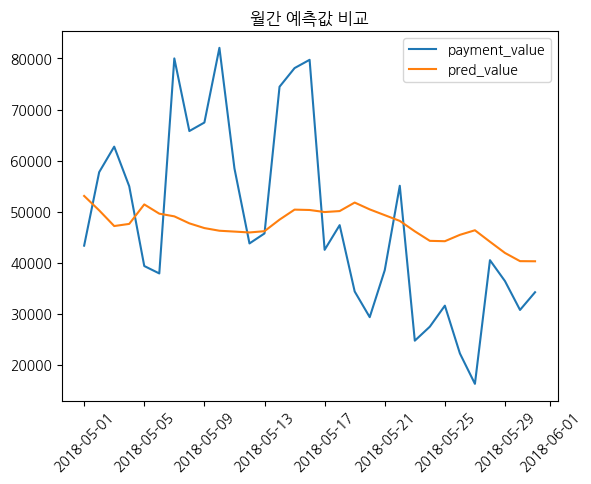

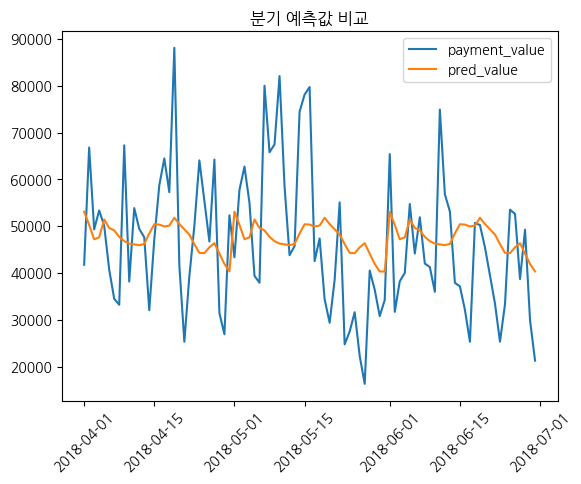

In [32]:
# 주
predict_week = result[(result.index>=pd.to_datetime('2018-05-06'))&(result.index<pd.to_datetime('2018-05-13'))]

# plt.figure(figsize=(12,5))
plt.plot(predict_week['payment_value'], linestyle='-', label='payment_value')
plt.plot(predict_week['pred_value'], linestyle='-', label='pred_value')
plt.title('주간 예측값 비교')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# 월
predict_month = result[(result.index>=pd.to_datetime('2018-05'))&(result.index<pd.to_datetime('2018-06'))]

# plt.figure(figsize=(12,5))
plt.plot(predict_month['payment_value'], linestyle='-', label='payment_value')
plt.plot(predict_month['pred_value'], linestyle='-', label='pred_value')
plt.title('월간 예측값 비교')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# 분기
predict_quarter = result[(result.index>=pd.to_datetime('2018-04'))&(result.index<pd.to_datetime('2018-07'))]

# plt.figure(figsize=(12,5))
plt.plot(predict_quarter['payment_value'], linestyle='-', label='payment_value')
plt.plot(predict_quarter['pred_value'], linestyle='-', label='pred_value')
plt.title('분기 예측값 비교')
plt.xticks(rotation=45)
plt.legend()
plt.show()

## 7. 주별, 월별, 분기별 매출 예측값 확인

In [29]:
real_week_pay_val = predict_week.payment_value.sum()
real_month_pay_val = predict_month.payment_value.sum()
real_quater_pay_val = predict_quarter.payment_value.sum()

predict_week_pay_val = predict_week.pred_value.sum()
predict_month_pay_val = predict_month.pred_value.sum()
predict_quater_pay_val = predict_quarter.pred_value.sum() 

diff_week_pay_val = predict_week.diff_value.sum()
diff_month_pay_val = predict_month.diff_value.sum()
diff_quater_pay_val = predict_quarter.diff_value.sum() 

In [30]:
diff_df = pd.DataFrame(index=['주','월','분기'], columns=['실제값', '예측값', '금액차이(R$)', '실제값과 차이 비율'])
diff_df['실제값'] = [real_week_pay_val, real_month_pay_val, real_quater_pay_val]
diff_df['예측값'] = [predict_week_pay_val, predict_month_pay_val, predict_quater_pay_val]
diff_df['금액차이(R$)'] = [diff_week_pay_val, diff_month_pay_val, diff_quater_pay_val]
# diff_df['금액차이(만원)'] = [int(diff_week_pay_val * real_to_won / 10000), int(diff_month_pay_val * real_to_won/ 10000), int(diff_quater_pay_val * real_to_won/ 10000)]
diff_df['실제값과 차이 비율'] = [round(diff_week_pay_val/real_week_pay_val*100,2),  round(diff_month_pay_val/real_month_pay_val*100,2), round(diff_quater_pay_val/real_quater_pay_val*100,2)]
diff_df

,실제값,예측값,금액차이(R$),실제값과 차이 비율
주,435526.69,331611.43,131600.24,30.22
월,1483653.11,1469814.64,462334.97,31.16
분기,4241365.53,4328822.58,1117489.69,26.35
